# Problem Statement:
**Predicting temperature of the Permanent Magnet Synchronous Motor(PMSM) given other sensor measurements during operation..**

# 1. Import Necessary Libraries

- We will start by importing the libraries we will require for performing EDA. These include NumPy, Pandas, Matplotlib, and Seaborn.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, classification_report
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# 2. Import Data

- We will now read the data from a CSV file into a Pandas DataFrame

In [1]:
Electric_Motor = pd.read_csv('E:\P-95 Excelr\\temperature_data.csv')
Electric_Motor 


<IPython.core.display.Javascript object>

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

##### -**All measurements have been normalized and not represent real magnitudes**

# Exploratory Data Analysis(EDA)

- Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project.

- EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

- EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

# 3. Data Understanding

In [8]:
Electric_Motor.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [9]:
Electric_Motor.tail()

ambient   coolant       u_d       u_q  motor_speed   torque  \
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.25564   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.25564   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.25564   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.25564   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.25564   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72

##### 
- Dataset has nearly 100,000 data readings of 13 different electrical, thermodynamic and mechanical variables. 

- The profile_id column represents the identification number for the recorded continuos session. The recording sessions vary in lenth of time.

In [10]:
Electric_Motor.describe(include='all') #All measurements are normalized & Not represents the real magnitude

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

##### 
- **For numerical parameters, fields like mean, standard deviation, percentiles, and maximum have been populated. This gives us a broad idea of our dataset**

In [11]:
Electric_Motor.shape #Rows & Colums

(998070, 13)

### Missing value imputation

- In case there are any missing entries, we will impute them with appropriate values

In [12]:
Electric_Motor.isna().sum() #Fiding num values

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [13]:
Electric_Motor.dtypes #Looking into type of dataset

ambient           float64
coolant           float64
u_d               float64
u_q               float64
motor_speed       float64
torque            float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
stator_tooth      float64
stator_winding    float64
profile_id          int64
dtype: object

In [14]:
Electric_Motor.nunique() #Checking with unique values

ambient           718720
coolant           829538
u_d               960969
u_q               931072
motor_speed       490798
torque            695029
i_d               661242
i_q               655589
pm                945166
stator_yoke       861836
stator_tooth      854787
stator_winding    899142
profile_id            52
dtype: int64

In [15]:
Electric_Motor['torque'].nunique() #For torque

695029

In [16]:
Electric_Motor['profile_id'].unique() #For profile ID

array([ 4,  6, 10, 11, 20, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       72], dtype=int64)

In [17]:
Electric_Motor

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

In [18]:
Electric_Motor.info() #All data is nuemarical representing sensor measurements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [19]:
Electric_Motor['profile_id'].value_counts()

20    43970
6     40387
65    40093
66    36475
27    35360
4     33423
58    33381
56    33122
53    32441
79    31153
44    26340
70    25676
62    25599
30    23862
80    23823
74    23760
68    23330
36    22608
76    22187
48    21982
29    21357
32    20959
81    17671
45    17141
42    16919
73    16785
41    16699
63    16667
31    15586
69    15349
72    15300
10    15255
71    14655
77    14621
60    14542
61    14515
57    14402
75    13471
67    11134
49    10815
50    10809
54    10806
55    10806
78     8444
43     8442
11     7886
59     7474
51     6260
64     6249
52     3725
46     2179
47     2175
Name: profile_id, dtype: int64

In [20]:
Electric_Motor.value_counts

<bound method DataFrame.value_counts of          ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572

# 4. Data Preparation

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
del Electric_Motor['profile_id']

In [23]:
Electric_Motor

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  
0            -2.018033  
1            -2.017631  
2            -2.017343  
3            -2.017632  
4            -2.018145  
...                ...  
998065        0.494725  
998066        0.494279  
998067        0.492666  
998068        0.490581  
998069        0.489382  

[998070 rows x 12 columns]

# Data Normalization

In [24]:
Scaler = StandardScaler()
Electric_Motor_1 = Scaler.fit_transform(Electric_Motor)
Electric_Motor_1

array([[-0.75341625, -1.12045388,  0.32384208, ..., -1.83011168,
        -2.06476719, -2.01744231],
       [-0.77266885, -1.11903183,  0.32557536, ..., -1.82965916,
        -2.06348257, -2.01704034],
       [-0.78437773, -1.11869335,  0.32868866, ..., -1.82909105,
        -2.06269656, -2.01675207],
       ...,
       [-0.03871069,  0.30196085,  0.32685895, ...,  1.0012465 ,
         0.83648055,  0.49742538],
       [-0.03577363,  0.29664037,  0.32690032, ...,  0.99750219,
         0.83304777,  0.49533692],
       [-0.04017317,  0.30719908,  0.32674256, ...,  0.98551992,
         0.83058818,  0.49413635]])

In [25]:
Electric_Motor_1_N = pd.DataFrame(Electric_Motor_1, columns=Electric_Motor.columns)
Electric_Motor_1_N

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.753416 -1.120454  0.323842 -1.289164    -1.214600 -0.247367   
1      -0.772669 -1.119032  0.325575 -1.288994    -1.214601 -0.246316   
2      -0.784378 -1.118693  0.328689 -1.293119    -1.214600 -0.246615   
3      -0.782408 -1.118776  0.329619 -1.293150    -1.214602 -0.245818   
4      -0.775467 -1.118787  0.331128 -1.294413    -1.214601 -0.245883   
...          ...       ...       ...       ...          ...       ...   
998065 -0.043894  0.336101  0.327389 -1.237541    -1.214600 -0.252836   
998066 -0.045245  0.314537  0.327616 -1.242071    -1.214609 -0.252836   
998067 -0.038711  0.301961  0.326859 -1.238277    -1.214602 -0.252836   
998068 -0.035774  0.296640  0.326900 -1.240924    -1.214604 -0.252836   
998069 -0.040173  0.307199  0.326743 -1.238017    -1.214603 -0.252836   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.024560 -0.243174 -2.528584    -1.830112     -2.064767   
1       1.024497 -0.243146 -2.528932    -1.829659     -2.063483   
2       1.024435 -0.243132 -2.529189    -1.829091     -2.062697   
3       1.027836 -0.244271 -2.528150    -1.829024     -2.061760   
4       1.026797 -0.243925 -2.528413    -1.829189     -2.061418   
...          ...       ...       ...          ...           ...   
998065  1.024130 -0.243036  0.436131     1.016892      0.838630   
998066  1.024135 -0.243049  0.436028     1.011746      0.836983   
998067  1.024178 -0.243015  0.435715     1.001246      0.836481   
998068  1.024134 -0.243041  0.435834     0.997502      0.833048   
998069  1.024128 -0.243036  0.435441     0.985520      0.830588   

        stator_winding  
0            -2.017442  
1            -2.017040  
2            -2.016752  
3            -2.017041  
4            -2.017555  
...                ...  
998065        0.499487  
998066        0.499041  
998067        0.497425  
998068        0.495337  
998069        0.494136  

[998070 rows x 12 columns]

In [26]:
Electric_Motor_1_N.dtypes

ambient           float64
coolant           float64
u_d               float64
u_q               float64
motor_speed       float64
torque            float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
stator_tooth      float64
stator_winding    float64
dtype: object

### Checking with mean & Standard deviation

In [27]:
Electric_Motor_1_N.mean()

ambient          -8.710848e-14
coolant           3.311537e-14
u_d              -5.435962e-15
u_q               2.790820e-16
motor_speed       3.734451e-15
torque           -5.697083e-13
i_d               2.613170e-15
i_q               9.983176e-16
pm               -1.469712e-15
stator_yoke      -1.524101e-14
stator_tooth      1.158428e-15
stator_winding   -6.861447e-15
dtype: float64

In [28]:
Electric_Motor_1_N.std()

ambient           1.000001
coolant           1.000001
u_d               1.000001
u_q               1.000001
motor_speed       1.000001
torque            1.000001
i_d               1.000001
i_q               1.000001
pm                1.000001
stator_yoke       1.000001
stator_tooth      1.000001
stator_winding    1.000001
dtype: float64

# Data Visualization with various graphs

### Graphical Representation using boxplot

- Boxplot is used to identify the outliers present the dataset

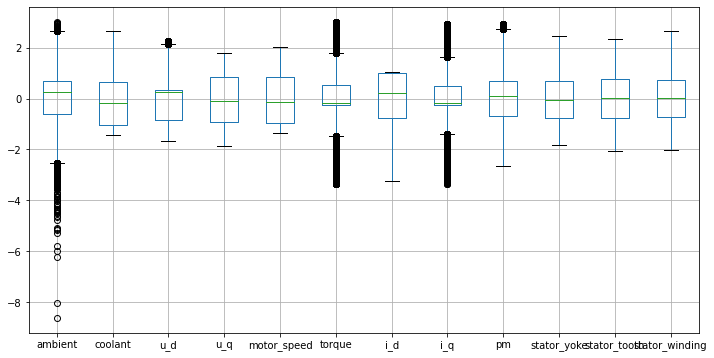

In [24]:
Electric_Motor_1_N.boxplot(figsize=(12,6))
plt.show()

## Outliers are present in below features
- Ambient
- u_d
- Torque
- i_q
- pm

# Outliers Removing

### 1. Ambient

In [25]:
q1=Electric_Motor_1_N.ambient.quantile(0.25)
q3=Electric_Motor_1_N.ambient.quantile(0.75)
iqr=q3-q1
iqr

1.294961788707449

In [26]:
ub=q3+1.5*iqr
ub

2.6378031349433604

In [27]:
lb=q1-1.5*iqr
lb

-2.5420440198864354

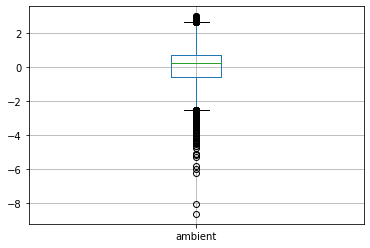

In [28]:
Electric_Motor_1_N.boxplot('ambient')
plt.show()

In [29]:
Electric_Motor_1_N[Electric_Motor_1_N['ambient']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
51062   2.650795  1.005438 -1.174750  0.711479     1.487534  0.346022   
51063   2.699631  1.005716 -1.173710  0.714405     1.487534  0.346082   
51064   2.733268  1.005996 -1.171983  0.714847     1.487538  0.346134   
51065   2.735216  1.006126 -1.171735  0.717010     1.487535  0.345567   
51066   2.699747  1.006011 -1.171567  0.716829     1.487535  0.345232   
...          ...       ...       ...       ...          ...       ...   
556660  2.664902  1.055786  0.277840  1.760307     1.184938 -0.281267   
556661  2.667971  1.055236  0.252855  1.759183     1.192975 -0.270834   
556662  2.663456  1.054635  0.213743  1.755326     1.203402 -0.254550   
556663  2.660222  1.054204  0.164284  1.748966     1.213600 -0.233167   
556664  2.647680  1.053661  0.102706  1.738062     1.221671 -0.207321   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
51062  -0.997947  0.316777  1.928760     1.325617      1.439464   
51063  -0.999580  0.316657  1.928711     1.326415      1.440625   
51064  -1.000141  0.316650  1.928405     1.326736      1.438779   
51065  -1.000367  0.316474  1.928316     1.326710      1.438527   
51066  -1.000597  0.316165  1.927297     1.326860      1.439037   
...          ...       ...       ...          ...           ...   
556660 -0.084226 -0.271873  1.313874     1.120977      0.994773   
556661 -0.091756 -0.261368  1.327868     1.120890      0.993770   
556662 -0.103742 -0.244955  1.327161     1.120827      0.994115   
556663 -0.117378 -0.223427  1.321976     1.120782      0.994231   
556664 -0.132424 -0.197445  1.317756     1.120749      0.995055   

        stator_winding  
51062         1.267642  
51063         1.267642  
51064         1.267642  
51065         1.267642  
51066         1.267642  
...                ...  
556660        0.664942  
556661        0.663610  
556662        0.662604  
556663        0.662796  
556664        0.662365  

[132 rows x 12 columns]

In [30]:
Electric_Motor_1_N[Electric_Motor_1_N['ambient']<lb]

ambient   coolant       u_d       u_q  motor_speed    torque  \
36414  -3.720567 -1.290263 -1.133511  0.750622     1.487536  0.354889   
36415  -2.906820 -1.235662 -1.135347  0.750927     1.487534  0.354191   
73810  -2.764957 -1.064265  0.328452 -1.268235    -1.214603 -0.240478   
73811  -2.764957 -1.065242  0.329107 -1.271106    -1.214599 -0.241162   
73812  -2.764957 -1.065381  0.327808 -1.267098    -1.214601 -0.240339   
...          ...       ...       ...       ...          ...       ...   
947783 -2.796042  0.049946  0.948997  0.126597    -0.404548 -1.048679   
989728 -4.428139 -0.995368  1.004167  1.241913     1.945881 -0.607063   
989729 -5.272207 -1.080932  0.777935  1.371489     1.941306 -0.509743   
989730 -3.817157 -0.927692  0.786821  1.439833     1.923238 -0.506907   
989731 -2.775141 -0.817685  0.900159  1.434456     1.896717 -0.550336   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
36414  -1.085933  0.308247  0.147172    -0.702684     -0.221975   
36415  -1.084064  0.308666  0.147012    -0.711721     -0.221862   
73810   1.024124 -0.243037 -2.530038    -1.819933     -2.057939   
73811   1.024144 -0.243030 -2.529675    -1.819486     -2.058006   
73812   1.024151 -0.243020 -2.529524    -1.818844     -2.058033   
...          ...       ...       ...          ...           ...   
947783  0.726339 -1.151530  0.225724     0.226001      0.030149   
989728 -0.945990 -0.570926  0.390356    -0.734554     -0.760052   
989729 -0.872145 -0.482795  0.382013    -0.734557     -0.760051   
989730 -0.823712 -0.482090  0.381878    -0.734559     -0.760050   
989731 -0.812851 -0.522354  0.381913    -0.734560     -0.760050   

        stator_winding  
36414         0.020136  
36415         0.020650  
73810        -2.003613  
73811        -2.003106  
73812        -2.002707  
...                ...  
947783       -0.117555  
989728       -0.720999  
989729       -0.717236  
989730       -0.713819  
989731       -0.711458  

[38360 rows x 12 columns]

In [31]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['ambient']>=2.6,'ambient']=2.6
Electric_Motor_1_N.loc[Electric_Motor_1_N['ambient']<=-2.5,'ambient']=-2.5

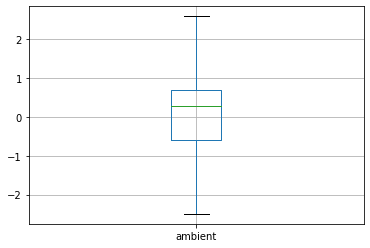

In [32]:
Electric_Motor_1_N.boxplot('ambient')
plt.show()

## 2. u_d

In [33]:
q1=Electric_Motor_1_N.u_d.quantile(0.25)
q3=Electric_Motor_1_N.u_d.quantile(0.75)
iqr=q3-q1
iqr

1.1873696667892364

In [34]:
ub=q3+1.5*iqr
ub

2.1355173800786513

In [35]:
lb=q1-1.5*iqr
lb

-2.6139612870782942

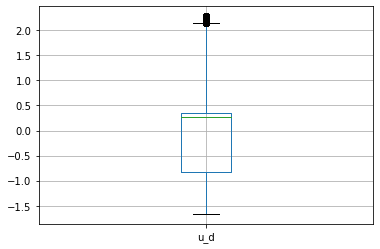

In [36]:
Electric_Motor_1_N.boxplot('u_d')
plt.show()

In [37]:
Electric_Motor_1_N[Electric_Motor_1_N['u_d']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
64736   0.637096 -1.095675  2.136151 -0.219395     0.136357 -2.164962   
64737   0.611040 -1.096160  2.170091 -0.374261     0.136384 -2.258827   
64738   0.589883 -1.096504  2.195442 -0.507100     0.136380 -2.331792   
64739   0.574097 -1.096820  2.213177 -0.808796     0.136348 -2.450413   
64740   0.558275 -1.096930  2.223030 -1.088536     0.136380 -2.553290   
...          ...       ...       ...       ...          ...       ...   
995572 -0.122304 -0.697781  2.157315 -0.255950     0.221501 -2.085793   
995573 -0.123062 -0.694680  2.148964 -0.209879     0.224204 -2.058034   
995580 -0.116055 -0.694505  2.142024 -0.159688     0.133783 -2.142095   
995581 -0.118585 -0.696690  2.147727 -0.178414     0.148443 -2.135755   
995582 -0.120863 -0.698439  2.145093 -0.165982     0.160635 -2.114014   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
64736  -1.048812 -2.034156 -0.164818    -0.734564     -0.376416   
64737  -1.260955 -2.092766 -0.164609    -0.734564     -0.378827   
64738  -1.441296 -2.138755 -0.164222    -0.734564     -0.376867   
64739  -1.855910 -2.205055 -0.164082    -0.734564     -0.373328   
64740  -2.239619 -2.258798 -0.163988    -0.734564     -0.374924   
...          ...       ...       ...          ...           ...   
995572 -1.201779 -1.964923 -0.852986    -0.934013     -0.890458   
995573 -1.143379 -1.945795 -0.861399    -0.930389     -0.888648   
995580 -0.980440 -2.056233 -0.858131    -0.917717     -0.878360   
995581 -1.021740 -2.043186 -0.862172    -0.917966     -0.875777   
995582 -1.019045 -2.021496 -0.853589    -0.916155     -0.873926   

        stator_winding  
64736        -0.130374  
64737        -0.133739  
64738        -0.138146  
64739        -0.140798  
64740        -0.141688  
...                ...  
995572       -0.772420  
995573       -0.774499  
995580       -0.743190  
995581       -0.737529  
995582       -0.733557  

[18050 rows x 12 columns]

In [38]:
Electric_Motor_1_N[Electric_Motor_1_N['u_d']<lb]

Empty DataFrame
Columns: [ambient, coolant, u_d, u_q, motor_speed, torque, i_d, i_q, pm, stator_yoke, stator_tooth, stator_winding]
Index: []

In [39]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['u_d']>=2.13,'u_d']=2.13
Electric_Motor_1_N.loc[Electric_Motor_1_N['u_d']<=-2.16,'u_d']=-2.16

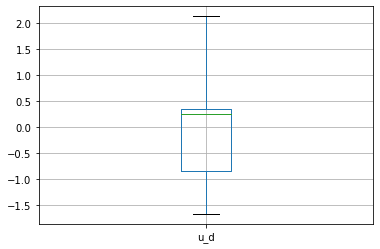

In [40]:
Electric_Motor_1_N.boxplot('u_d')
plt.show()

## 3. Torque

In [41]:
q1=Electric_Motor_1_N.torque.quantile(0.25)
q3=Electric_Motor_1_N.torque.quantile(0.75)
iqr=q3-q1
iqr

0.8157960718393337

In [42]:
ub=q3+1.5*iqr
ub

1.7753526330516056

In [43]:
lb=q1-1.5*iqr
lb

-1.487831654305729

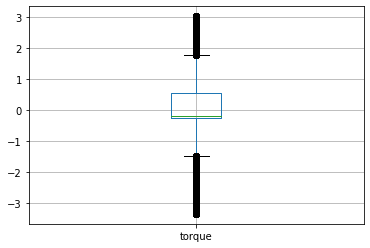

In [44]:
Electric_Motor_1_N.boxplot('torque')
plt.show()

In [45]:
Electric_Motor_1_N[Electric_Motor_1_N['torque']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
21866   0.183363 -1.041328 -1.437720  0.148486    -0.133694  1.812493   
21867   0.193976 -1.041139 -1.455268  0.090175    -0.133707  1.858307   
21868   0.195721 -1.040945 -1.467465  0.047154    -0.133721  1.892124   
21869   0.188811 -1.040794 -1.476486  0.018601    -0.133728  1.915428   
21870   0.162362 -1.040322 -1.483169 -0.002439    -0.133732  1.932075   
...          ...       ...       ...       ...          ...       ...   
996944 -0.087042  1.459179 -1.549911 -0.300555    -0.093651  2.031137   
996945 -0.084506  1.458948 -1.502595 -0.141854    -0.096793  1.917241   
996946 -0.083711  1.458850 -1.419172  0.004484    -0.116942  1.781597   
996958 -0.069783  1.460209 -1.588949 -0.590703     0.096693  1.780724   
996959 -0.078785  1.461295 -1.585867 -0.536025     0.083637  1.788347   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
21866  -0.557368  1.811112 -0.995147    -1.048344     -0.954575   
21867  -0.661794  1.836681 -0.992734    -1.049174     -0.954163   
21868  -0.737139  1.854926 -0.992746    -1.048623     -0.953763   
21869  -0.789397  1.868387 -0.994923    -1.048050     -0.953149   
21870  -0.827515  1.877821 -0.996751    -1.047698     -0.952937   
...          ...       ...       ...          ...           ...   
996944 -1.327916  1.912858 -0.394063     0.946030      0.593253   
996945 -1.040988  1.849301 -0.395086     0.946450      0.591782   
996946 -0.735162  1.767996 -0.388505     0.947244      0.597615   
996958 -1.822049  1.591376 -0.401824     0.949551      0.637293   
996959 -1.746868  1.606916 -0.402180     0.949570      0.639490   

        stator_winding  
21866        -0.838167  
21867        -0.837693  
21868        -0.838092  
21869        -0.837349  
21870        -0.831350  
...                ...  
996944        0.395260  
996945        0.409534  
996946        0.414355  
996958        0.487713  
996959        0.485637  

[46838 rows x 12 columns]

In [46]:
Electric_Motor_1_N[Electric_Motor_1_N['torque']<lb]

ambient   coolant       u_d       u_q  motor_speed    torque  \
59375   0.500143 -1.071996  1.025175 -0.475731    -0.668617 -1.630980   
59376   0.495834 -1.071608  1.236930 -0.242405    -0.515157 -1.721943   
59377   0.502643 -1.071378  1.449738 -0.004595    -0.359114 -1.807770   
59378   0.507611 -1.070205  1.619396  0.128791    -0.218677 -1.830951   
59379   0.503368 -1.068505  1.725817  0.184473    -0.117988 -1.842743   
...          ...       ...       ...       ...          ...       ...   
996879 -0.096330  1.460508  1.898797  0.504374     0.077798 -1.751456   
996880 -0.096273  1.461006  1.932476  0.429726     0.082081 -1.803517   
996881 -0.091632  1.460760  1.964753  0.354526     0.101884 -1.839904   
996882 -0.095462  1.460751  1.991615  0.289865     0.132946 -1.856664   
996883 -0.094628  1.460678  1.808716  0.516497     0.158135 -1.629269   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
59375   0.400950 -1.594656 -1.175700    -1.751032     -1.984352   
59376   0.344072 -1.692022 -1.176475    -1.750092     -1.984352   
59377   0.301588 -1.762603 -1.176369    -1.749071     -1.984352   
59378   0.165773 -1.792591 -1.176077    -1.749104     -1.984352   
59379   0.012048 -1.802182 -1.176269    -1.749786     -1.984352   
...          ...       ...       ...          ...           ...   
996879  0.084205 -1.834083 -0.493536     0.886913      0.452196   
996880 -0.028732 -1.868690 -0.493793     0.888451      0.452478   
996881 -0.165898 -1.882416 -0.489440     0.889960      0.452525   
996882 -0.301038 -1.876331 -0.483354     0.889529      0.451954   
996883 -0.067862 -1.658707 -0.514005     0.888620      0.451419   

        stator_winding  
59375        -1.968839  
59376        -1.969496  
59377        -1.969708  
59378        -1.969238  
59379        -1.968987  
...                ...  
996879        0.076054  
996880        0.083044  
996881        0.088053  
996882        0.093076  
996883        0.099839  

[80465 rows x 12 columns]

In [47]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['torque']>=1.77,'torque']=1.77
Electric_Motor_1_N.loc[Electric_Motor_1_N['torque']<=-1.48,'torque']=-1.48

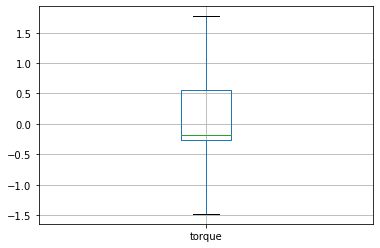

In [48]:
Electric_Motor_1_N.boxplot('torque')
plt.show()

## 4. i_q

In [49]:
q1=Electric_Motor_1_N.i_q.quantile(0.25)
q3=Electric_Motor_1_N.i_q.quantile(0.75)
iqr=q3-q1
iqr

0.7581121405766286

In [50]:
ub=q3+1.5*iqr
ub

1.6406737285657889

In [51]:
lb=q1-1.5*iqr
lb

-1.3917748337407252

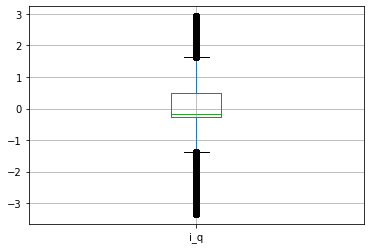

In [52]:
Electric_Motor_1_N.boxplot('i_q')
plt.show()

In [53]:
Electric_Motor_1_N[Electric_Motor_1_N['i_q']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
21864   0.166458 -1.041612 -1.377433  0.337643    -0.133645  1.658968   
21865   0.172655 -1.041503 -1.413092  0.229766    -0.133677  1.748357   
21866   0.183363 -1.041328 -1.437720  0.148486    -0.133694  1.770000   
21867   0.193976 -1.041139 -1.455268  0.090175    -0.133707  1.770000   
21868   0.195721 -1.040945 -1.467465  0.047154    -0.133721  1.770000   
...          ...       ...       ...       ...          ...       ...   
996945 -0.084506  1.458948 -1.502595 -0.141854    -0.096793  1.770000   
996946 -0.083711  1.458850 -1.419172  0.004484    -0.116942  1.770000   
996947 -0.084164  1.458846 -1.354321  0.125186    -0.126631  1.663055   
996968 -0.094536  1.460831 -1.467365  0.002266    -0.036289  1.694180   
996969 -0.094988  1.461003 -1.493076 -0.088183    -0.018299  1.723422   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
21864  -0.217568  1.723508 -0.997249    -1.046709     -0.953922   
21865  -0.411654  1.775303 -0.997301    -1.047723     -0.954179   
21866  -0.557368  1.811112 -0.995147    -1.048344     -0.954575   
21867  -0.661794  1.836681 -0.992734    -1.049174     -0.954163   
21868  -0.737139  1.854926 -0.992746    -1.048623     -0.953763   
...          ...       ...       ...          ...           ...   
996945 -1.040988  1.849301 -0.395086     0.946450      0.591782   
996946 -0.735162  1.767996 -0.388505     0.947244      0.597615   
996947 -0.497435  1.689789 -0.391071     0.947917      0.603283   
996968 -0.831117  1.655369 -0.399354     0.949615      0.661879   
996969 -0.997861  1.655434 -0.424127     0.949616      0.663701   

        stator_winding  
21864        -0.838201  
21865        -0.837386  
21866        -0.838167  
21867        -0.837693  
21868        -0.838092  
...                ...  
996945        0.409534  
996946        0.414355  
996947        0.427336  
996968        0.541749  
996969        0.553709  

[57527 rows x 12 columns]

In [54]:
Electric_Motor_1_N[Electric_Motor_1_N['i_q']<lb]

ambient   coolant       u_d       u_q  motor_speed    torque  \
59374   0.509890 -1.072654  0.811653 -0.712915    -0.824091 -1.479856   
59375   0.500143 -1.071996  1.025175 -0.475731    -0.668617 -1.480000   
59376   0.495834 -1.071608  1.236930 -0.242405    -0.515157 -1.480000   
59377   0.502643 -1.071378  1.449738 -0.004595    -0.359114 -1.480000   
59378   0.507611 -1.070205  1.619396  0.128791    -0.218677 -1.480000   
...          ...       ...       ...       ...          ...       ...   
996879 -0.096330  1.460508  1.898797  0.504374     0.077798 -1.480000   
996880 -0.096273  1.461006  1.932476  0.429726     0.082081 -1.480000   
996881 -0.091632  1.460760  1.964753  0.354526     0.101884 -1.480000   
996882 -0.095462  1.460751  1.991615  0.289865     0.132946 -1.480000   
996883 -0.094628  1.460678  1.808716  0.516497     0.158135 -1.480000   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
59374   0.480342 -1.458746 -1.175647    -1.751016     -1.984352   
59375   0.400950 -1.594656 -1.175700    -1.751032     -1.984352   
59376   0.344072 -1.692022 -1.176475    -1.750092     -1.984352   
59377   0.301588 -1.762603 -1.176369    -1.749071     -1.984352   
59378   0.165773 -1.792591 -1.176077    -1.749104     -1.984352   
...          ...       ...       ...          ...           ...   
996879  0.084205 -1.834083 -0.493536     0.886913      0.452196   
996880 -0.028732 -1.868690 -0.493793     0.888451      0.452478   
996881 -0.165898 -1.882416 -0.489440     0.889960      0.452525   
996882 -0.301038 -1.876331 -0.483354     0.889529      0.451954   
996883 -0.067862 -1.658707 -0.514005     0.888620      0.451419   

        stator_winding  
59374        -1.970419  
59375        -1.968839  
59376        -1.969496  
59377        -1.969708  
59378        -1.969238  
...                ...  
996879        0.076054  
996880        0.083044  
996881        0.088053  
996882        0.093076  
996883        0.099839  

[91008 rows x 12 columns]

In [55]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['i_q']>=1.64,'i_q']=1.64
Electric_Motor_1_N.loc[Electric_Motor_1_N['i_q']<=-1.39,'i_q']=-1.39

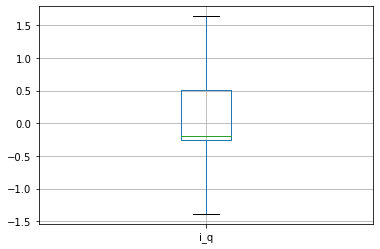

In [56]:
Electric_Motor_1_N.boxplot('i_q')
plt.show()

## 5. PM

In [57]:
q1=Electric_Motor_1_N.pm.quantile(0.25)
q3=Electric_Motor_1_N.pm.quantile(0.75)
iqr=q3-q1
iqr

1.3588614229650484

In [58]:
ub=q3+1.5*iqr
ub

2.726347780713824

In [59]:
lb=q1-1.5*iqr
lb

-2.7090979111463693

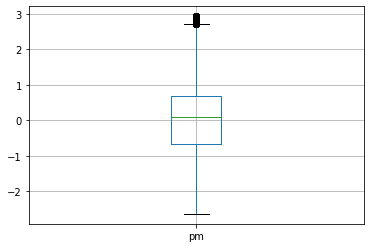

In [60]:
Electric_Motor_1_N.boxplot('pm')
plt.show()

In [61]:
Electric_Motor_1_N[Electric_Motor_1_N['pm']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
170802 -0.026843 -1.067942 -1.609949 -0.704208     1.946900  0.473444   
170803 -0.048692 -1.063849 -1.611133 -0.704973     1.946899  0.474103   
170805 -0.070983 -1.054423 -1.613415 -0.709868     1.946902  0.474936   
170806 -0.075780 -1.050452 -1.611358 -0.703644     1.946900  0.473821   
170811 -0.091908 -1.042785 -1.612200 -0.706975     1.946901  0.474265   
...          ...       ...       ...       ...          ...       ...   
172303  0.565563 -1.045975  0.338022 -1.254373    -1.214603 -0.172742   
172304  0.581440 -1.043633  0.337855 -1.252197    -1.214602 -0.171973   
172305  0.593513 -1.042136  0.337763 -1.253910    -1.214604 -0.172533   
172306  0.604534 -1.041246  0.337823 -1.251540    -1.214604 -0.171847   
172307  0.612081 -1.040829  0.337895 -1.254293    -1.214603 -0.172956   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
170802 -1.903882  0.372631  2.726804     0.276356      1.255046   
170803 -1.905093  0.372868  2.726722     0.276383      1.253202   
170805 -1.908753  0.373703  2.726459     0.276694      1.250905   
170806 -1.905301  0.372838  2.726751     0.276880      1.252494   
170811 -1.907312  0.373278  2.727102     0.276524      1.259623   
...          ...       ...       ...          ...           ...   
172303  1.024121 -0.243034  2.731756     0.531119      1.543425   
172304  1.024122 -0.243049  2.730603     0.530825      1.541878   
172305  1.024137 -0.243017  2.729544     0.530658      1.540753   
172306  1.024133 -0.243021  2.727968     0.529614      1.539947   
172307  1.024126 -0.243053  2.726799     0.528592      1.538445   

        stator_winding  
170802        1.735168  
170803        1.734982  
170805        1.732300  
170806        1.731889  
170811        1.734365  
...                ...  
172303        2.120168  
172304        2.102281  
172305        2.078437  
172306        2.060471  
172307        2.047581  

[1501 rows x 12 columns]

In [62]:
Electric_Motor_1_N[Electric_Motor_1_N['pm']<lb]

Empty DataFrame
Columns: [ambient, coolant, u_d, u_q, motor_speed, torque, i_d, i_q, pm, stator_yoke, stator_tooth, stator_winding]
Index: []

In [63]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['pm']>=2.72,'pm']=2.72
Electric_Motor_1_N.loc[Electric_Motor_1_N['pm']<=-2.7,'pm']=-2.7

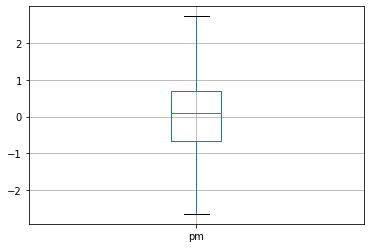

In [65]:
Electric_Motor_1_N.boxplot('pm')
plt.show()

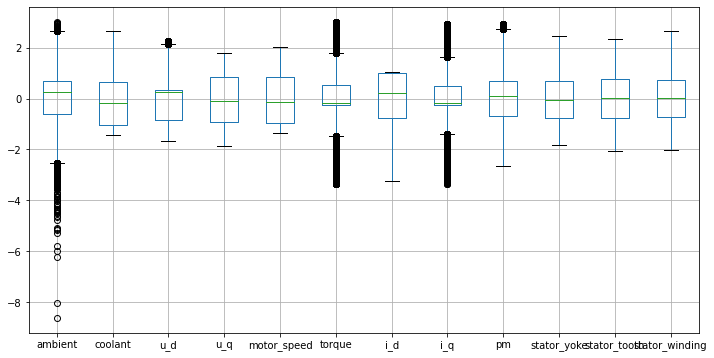

In [24]:
Electric_Motor_1_N.boxplot(figsize=(12,6))#No Outliers
plt.show()

In [25]:
Electric_Motor_1_N

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.753416 -1.120454  0.323842 -1.289164    -1.214600 -0.247367   
1      -0.772669 -1.119032  0.325575 -1.288994    -1.214601 -0.246316   
2      -0.784378 -1.118693  0.328689 -1.293119    -1.214600 -0.246615   
3      -0.782408 -1.118776  0.329619 -1.293150    -1.214602 -0.245818   
4      -0.775467 -1.118787  0.331128 -1.294413    -1.214601 -0.245883   
...          ...       ...       ...       ...          ...       ...   
998065 -0.043894  0.336101  0.327389 -1.237541    -1.214600 -0.252836   
998066 -0.045245  0.314537  0.327616 -1.242071    -1.214609 -0.252836   
998067 -0.038711  0.301961  0.326859 -1.238277    -1.214602 -0.252836   
998068 -0.035774  0.296640  0.326900 -1.240924    -1.214604 -0.252836   
998069 -0.040173  0.307199  0.326743 -1.238017    -1.214603 -0.252836   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.024560 -0.243174 -2.528584    -1.830112     -2.064767   
1       1.024497 -0.243146 -2.528932    -1.829659     -2.063483   
2       1.024435 -0.243132 -2.529189    -1.829091     -2.062697   
3       1.027836 -0.244271 -2.528150    -1.829024     -2.061760   
4       1.026797 -0.243925 -2.528413    -1.829189     -2.061418   
...          ...       ...       ...          ...           ...   
998065  1.024130 -0.243036  0.436131     1.016892      0.838630   
998066  1.024135 -0.243049  0.436028     1.011746      0.836983   
998067  1.024178 -0.243015  0.435715     1.001246      0.836481   
998068  1.024134 -0.243041  0.435834     0.997502      0.833048   
998069  1.024128 -0.243036  0.435441     0.985520      0.830588   

        stator_winding  
0            -2.017442  
1            -2.017040  
2            -2.016752  
3            -2.017041  
4            -2.017555  
...                ...  
998065        0.499487  
998066        0.499041  
998067        0.497425  
998068        0.495337  
998069        0.494136  

[998070 rows x 12 columns]

####  Graphical Representation using pairplot

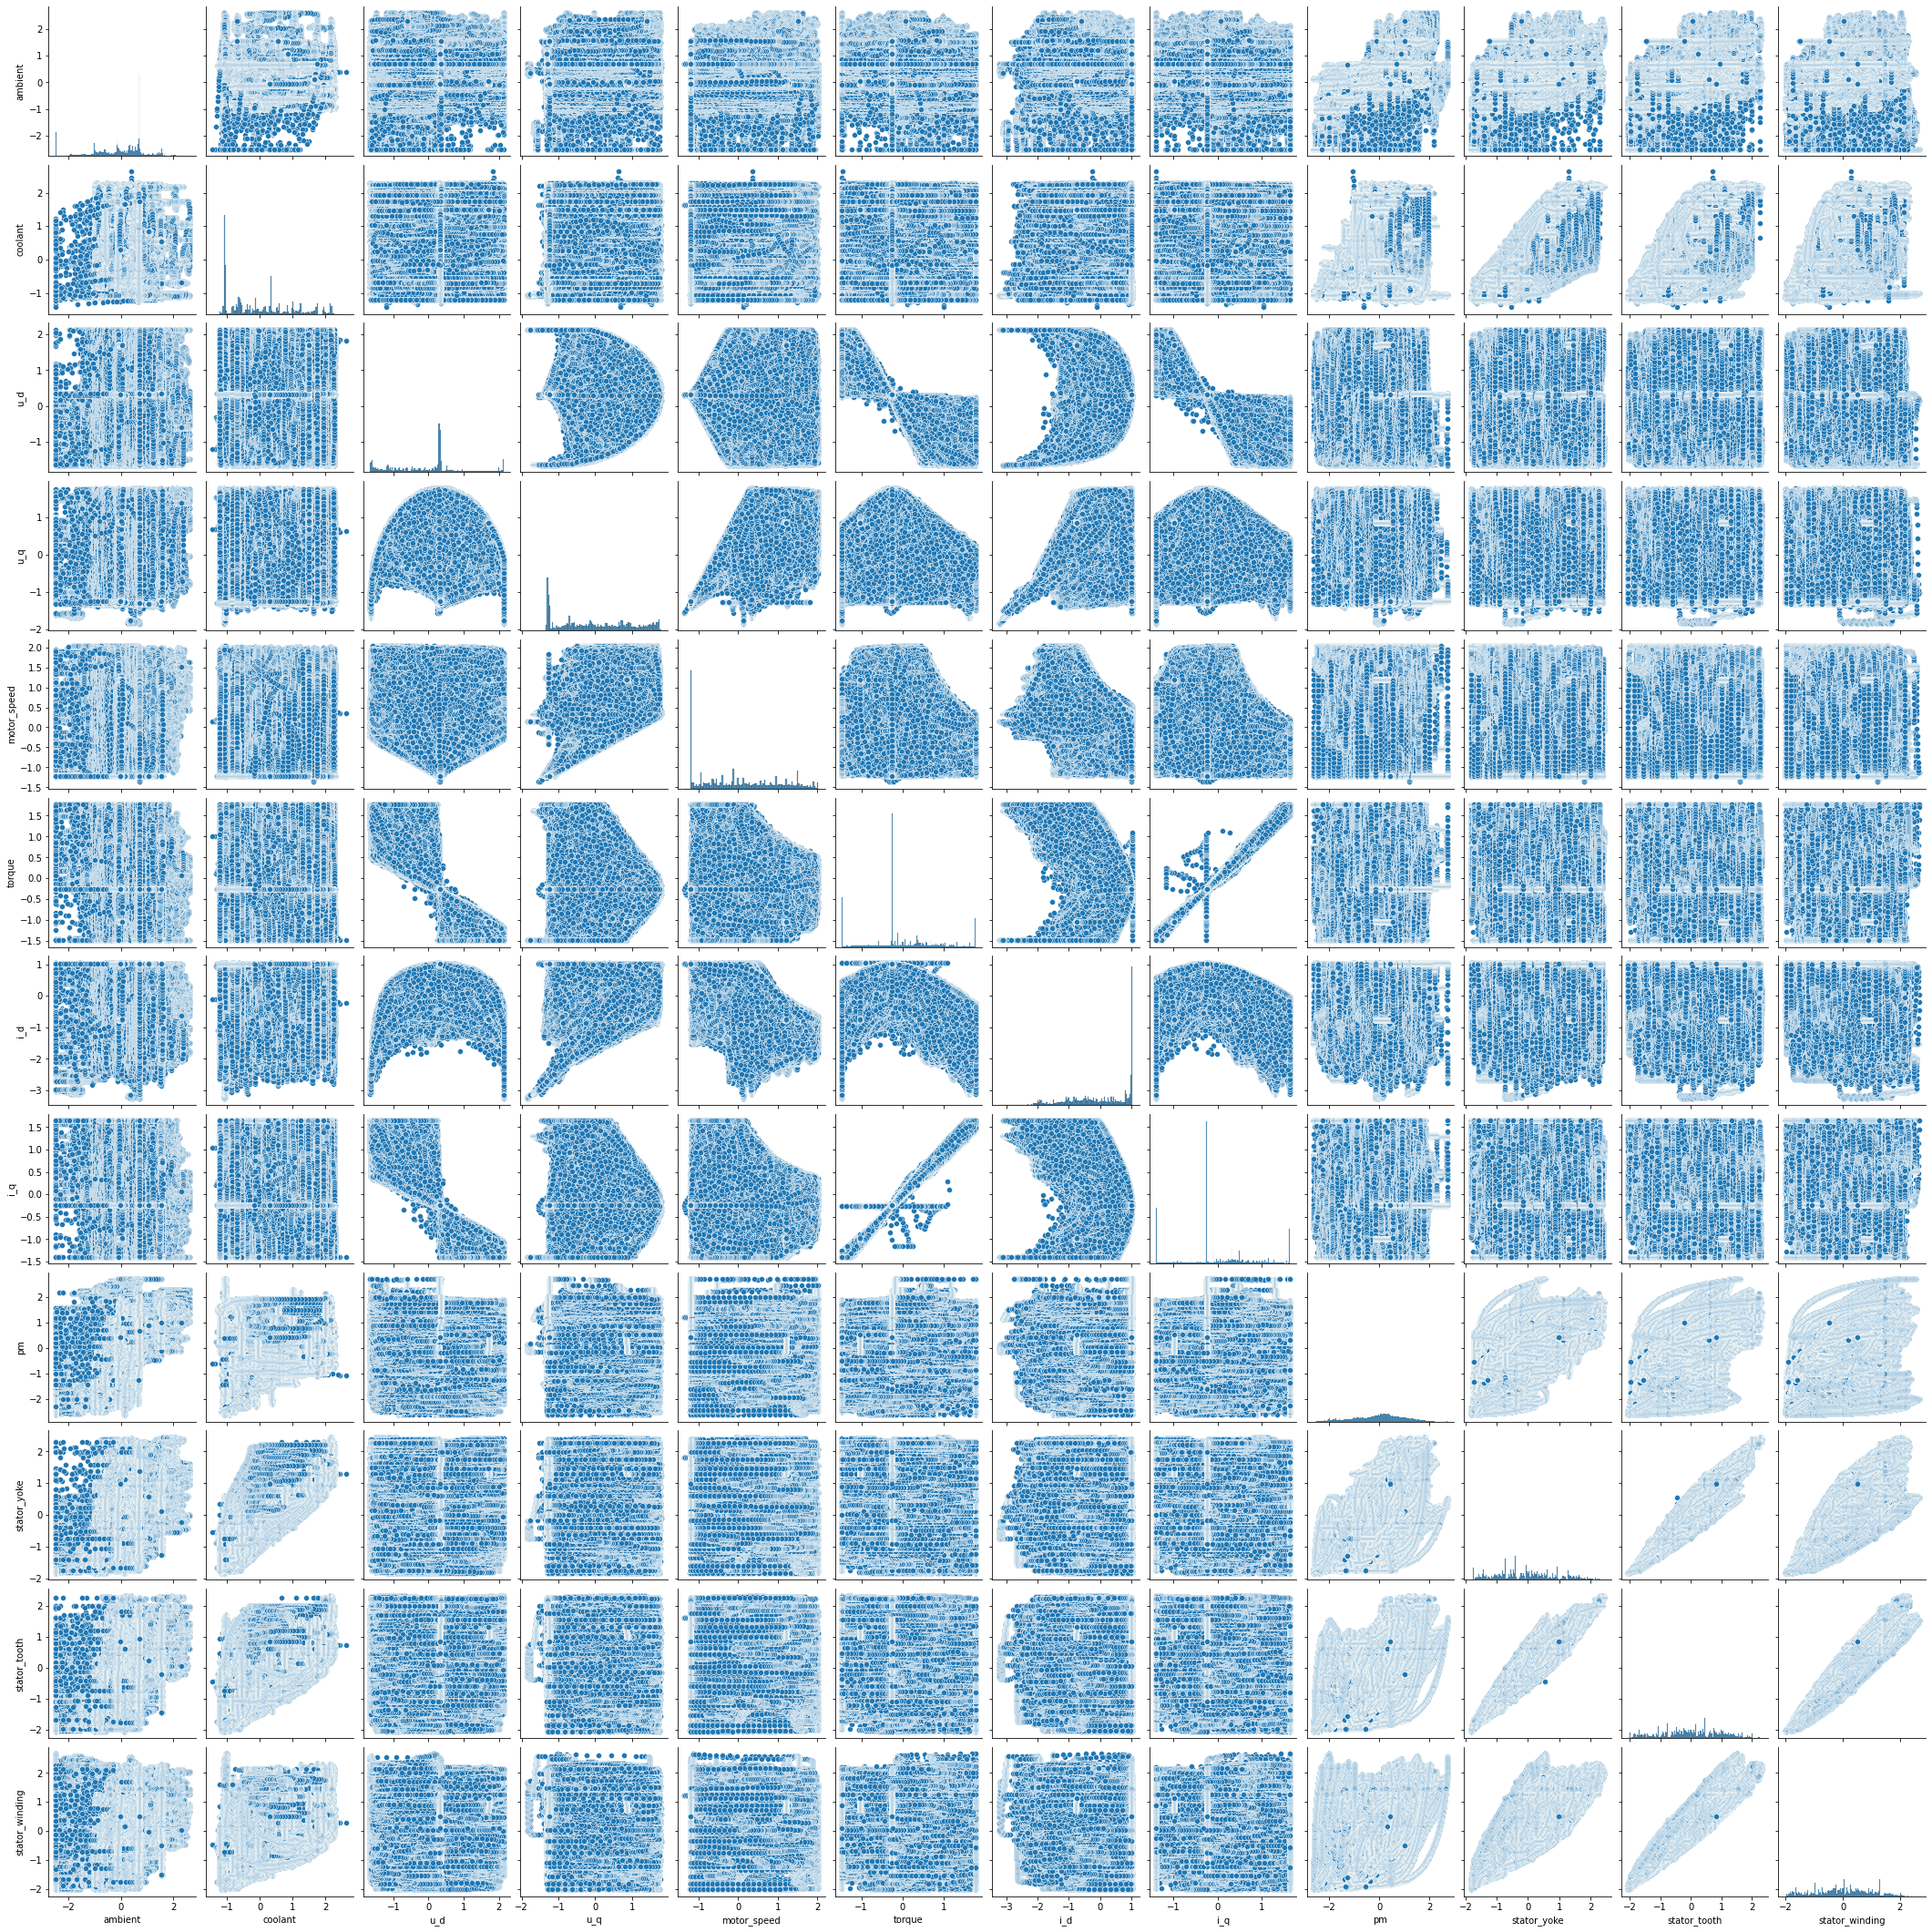

In [70]:
sns.pairplot(Electric_Motor_1_N)
plt.show()

# Graphical Representation using plot

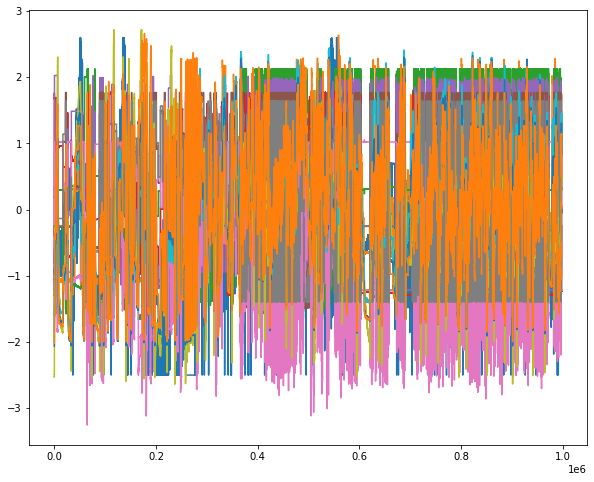

In [71]:
plt.figure(figsize=(10,8))
plt.plot(Electric_Motor_1_N)
plt.show()

###  Graphical Representation using histogram

- Histogram for to check wether my data is normally distributed or not

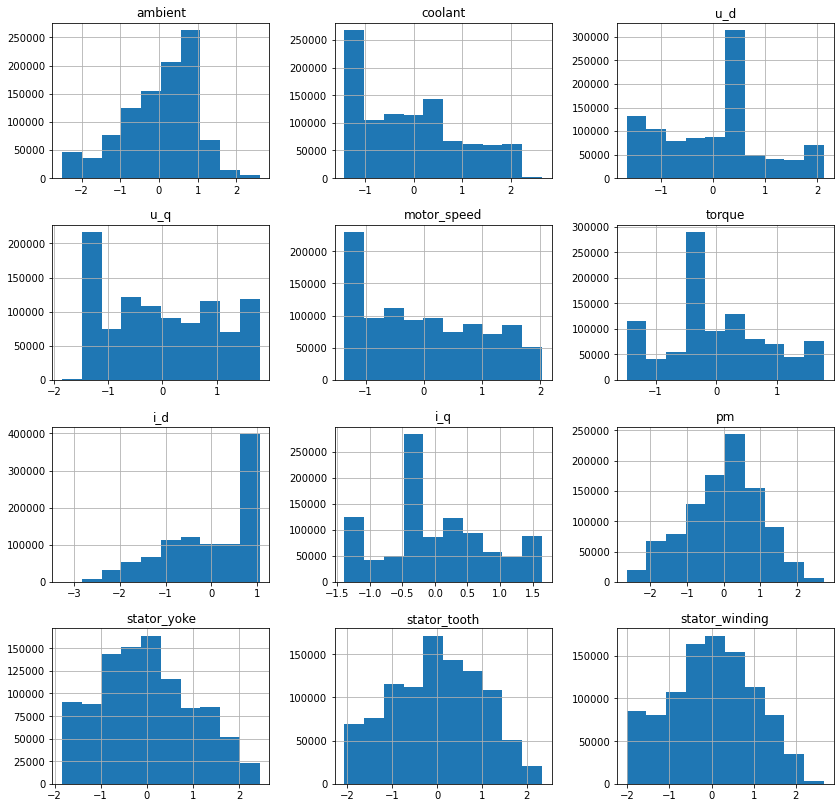

In [72]:
Electric_Motor_1_N.hist(figsize=(14,14))
plt.show()

#  Graphical Representation using scatter

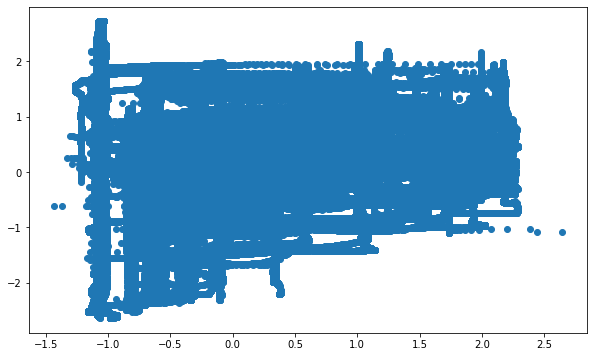

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(x='coolant', y='pm', data = Electric_Motor_1_N)
plt.show()

<Figure size 1440x1440 with 0 Axes>

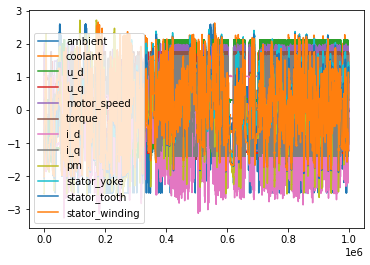

In [74]:
plt.figure(figsize=(20,20))
Electric_Motor_1_N.plot()
plt.show()

#  Graphical Representation using scatter plot

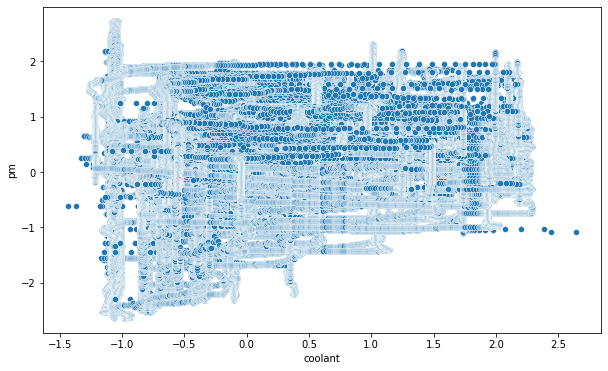

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'coolant', y='pm', data = Electric_Motor_1_N)
plt.show()

#  Graphical Representation using implot

<Figure size 720x576 with 0 Axes>

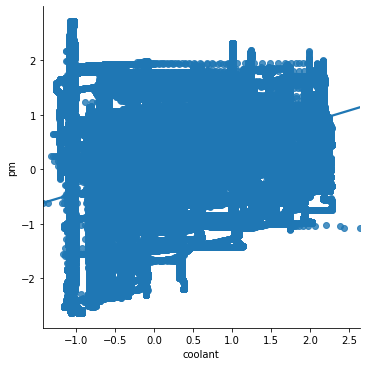

In [84]:
plt.figure(figsize=(10,8))
sns.lmplot(x= 'coolant', y='pm', data = Electric_Motor_1_N)
plt.show()

# Correlation on datapoints

In [77]:
Electric_Motor_1_N_Corr = Electric_Motor_1_N.corr()
Electric_Motor_1_N_Corr

ambient   coolant       u_d       u_q  motor_speed    torque  \
ambient         1.000000  0.435991  0.197732  0.085489     0.074830 -0.249493   
coolant         0.435991  1.000000  0.179040  0.027851    -0.033332 -0.193413   
u_d             0.197732  0.179040  1.000000 -0.026761    -0.235090 -0.860887   
u_q             0.085489  0.027851 -0.026761  1.000000     0.716897 -0.053158   
motor_speed     0.074830 -0.033332 -0.235090  0.716897     1.000000  0.029389   
torque         -0.249493 -0.193413 -0.860887 -0.053158     0.029389  1.000000   
i_d             0.005208  0.108489  0.361490 -0.181855    -0.722914 -0.280412   
i_q            -0.249540 -0.191138 -0.841678 -0.041223     0.007495  0.995759   
pm              0.498228  0.430966 -0.083069  0.101435     0.332293 -0.048884   
stator_yoke     0.453844  0.874037  0.041070  0.106186     0.182564 -0.079253   
stator_tooth    0.398928  0.689003 -0.067127  0.149017     0.333909  0.011050   
stator_winding  0.304782  0.509298 -0.152002  0.125445     0.393154  0.108779   

                     i_d       i_q        pm  stator_yoke  stator_tooth  \
ambient         0.005208 -0.249540  0.498228     0.453844      0.398928   
coolant         0.108489 -0.191138  0.430966     0.874037      0.689003   
u_d             0.361490 -0.841678 -0.083069     0.041070     -0.067127   
u_q            -0.181855 -0.041223  0.101435     0.106186      0.149017   
motor_speed    -0.722914  0.007495  0.332293     0.182564      0.333909   
torque         -0.280412  0.995759 -0.048884    -0.079253      0.011050   
i_d             1.000000 -0.242145 -0.299013    -0.179903     -0.387712   
i_q            -0.242145  1.000000 -0.063466    -0.086700     -0.003874   
pm             -0.299013 -0.063466  1.000000     0.695318      0.768509   
stator_yoke    -0.179903 -0.086700  0.695318     1.000000      0.949898   
stator_tooth   -0.387712 -0.003874  0.768509     0.949898      1.000000   
stator_winding -0.539924  0.087981  0.729605     0.845144      0.965633   

                stator_winding  
ambient               0.304782  
coolant               0.509298  
u_d                  -0.152002  
u_q                   0.125445  
motor_speed           0.393154  
torque                0.108779  
i_d                  -0.539924  
i_q                   0.087981  
pm                    0.729605  
stator_yoke           0.845144  
stator_tooth          0.965633  
stator_winding        1.000000

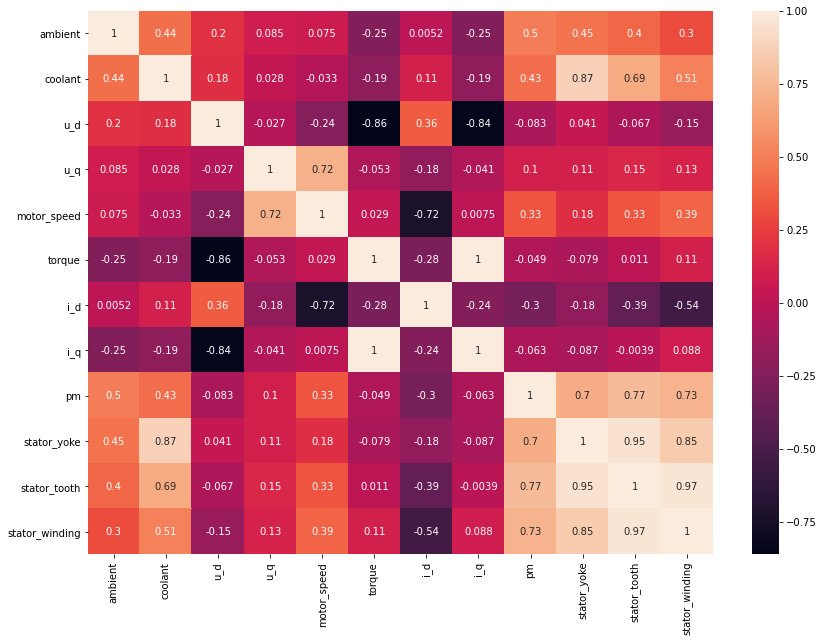

In [78]:
plt.figure(figsize=(14,10))
sns.heatmap(Electric_Motor_1_N_Corr, annot=True)
plt.show()

# Highly correlated features

#### - Coolant & Stator_yoke
- Torque & i_q
- i_q & Torque
- pm & Stator_winding
- Staor_yoke & Stator_tooth
- Stator_tooth & Stator_winding
- Stator_winding & Stator_tooth

# Feature Selection

In [79]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(Electric_Motor_1_N.drop('pm',axis=1),Electric_Motor_1_N['pm'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(Electric_Motor_1_N.drop('pm',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

Attribute     Score
9     stator_tooth  2.657688
10  stator_winding  2.454582
8      stator_yoke  2.018220
0          ambient  1.662154
1          coolant  1.249602
6              i_d  1.112070
4      motor_speed  1.073462
3              u_q  1.025619
7              i_q  1.010678
5           torque  1.007392
2              u_d  0.988949

- **Consider the variables with f_score higher than 0.5..I.e stator_tooth, stator_winding, stator_yoke, ambient, coolant, 
i_d, motor_speed, u_q, i_q, torque, u_d..**

In [29]:
Feature_Columns = {'stator_tooth', 'stator_winding', 'stator_yoke','ambient', 'coolant', 'i_d', 'motor_speed', 
                   'u_q', 'i_q', 'torque', 'u_d'}

In [30]:
X = Electric_Motor_1_N[Feature_Columns]

In [31]:
X

coolant    torque  stator_yoke  stator_tooth   ambient       u_d  \
0      -1.120454 -0.247367    -1.830112     -2.064767 -0.753416  0.323842   
1      -1.119032 -0.246316    -1.829659     -2.063483 -0.772669  0.325575   
2      -1.118693 -0.246615    -1.829091     -2.062697 -0.784378  0.328689   
3      -1.118776 -0.245818    -1.829024     -2.061760 -0.782408  0.329619   
4      -1.118787 -0.245883    -1.829189     -2.061418 -0.775467  0.331128   
...          ...       ...          ...           ...       ...       ...   
998065  0.336101 -0.252836     1.016892      0.838630 -0.043894  0.327389   
998066  0.314537 -0.252836     1.011746      0.836983 -0.045245  0.327616   
998067  0.301961 -0.252836     1.001246      0.836481 -0.038711  0.326859   
998068  0.296640 -0.252836     0.997502      0.833048 -0.035774  0.326900   
998069  0.307199 -0.252836     0.985520      0.830588 -0.040173  0.326743   

        stator_winding       i_q       i_d  motor_speed       u_q  
0            -2.017442 -0.243174  1.024560    -1.214600 -1.289164  
1            -2.017040 -0.243146  1.024497    -1.214601 -1.288994  
2            -2.016752 -0.243132  1.024435    -1.214600 -1.293119  
3            -2.017041 -0.244271  1.027836    -1.214602 -1.293150  
4            -2.017555 -0.243925  1.026797    -1.214601 -1.294413  
...                ...       ...       ...          ...       ...  
998065        0.499487 -0.243036  1.024130    -1.214600 -1.237541  
998066        0.499041 -0.243049  1.024135    -1.214609 -1.242071  
998067        0.497425 -0.243015  1.024178    -1.214602 -1.238277  
998068        0.495337 -0.243041  1.024134    -1.214604 -1.240924  
998069        0.494136 -0.243036  1.024128    -1.214603 -1.238017  

[998070 rows x 11 columns]

In [32]:
Y = Electric_Motor_1_N[['pm']]

In [33]:
Y

pm
0      -2.528584
1      -2.528932
2      -2.529189
3      -2.528150
4      -2.528413
...          ...
998065  0.436131
998066  0.436028
998067  0.435715
998068  0.435834
998069  0.435441

[998070 rows x 1 columns]

### Train test split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=12)

# Model Building

# 1. Linear Regressor

 - **One of the most interesting and common regression technique is simple linear regression. 
In this, we predict the outcome of a dependent variable based on the independent variables, the relationship between the variables is linear.**

In [35]:
l_reg = LinearRegression()
l_reg.fit(X_train,Y_train)

l_train_acc = (l_reg.score(X_train,Y_train))*100
l_test_acc = (l_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {l_train_acc}")
print(f"Test accuracy: {l_test_acc}")

Train accuracy: 77.20002736974052
Test accuracy: 77.2865856222581


In [36]:
Y_pred = l_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614, 1)


In [37]:
r2_l = r2_score(Y_test, Y_pred)*100
rms_l = sqrt(mean_squared_error(Y_test, Y_pred))
mae_l = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_l} %")
print(f"RMSE {rms_l}")
print(f"MAE {mae_l}")

R^2 score  77.2865856222581 %
RMSE 0.47636022621389595
MAE 0.36274403170185193


In [38]:
calculation = pd.DataFrame(np.c_[Y_test,l_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

Original Temperature  Predicted Temperature
0             -0.679550              -0.813158
1              0.000894              -0.265902
2              0.293739              -0.613994
3             -1.484652              -1.443020
4             -2.022299              -1.601771

##### Visualizing the test results

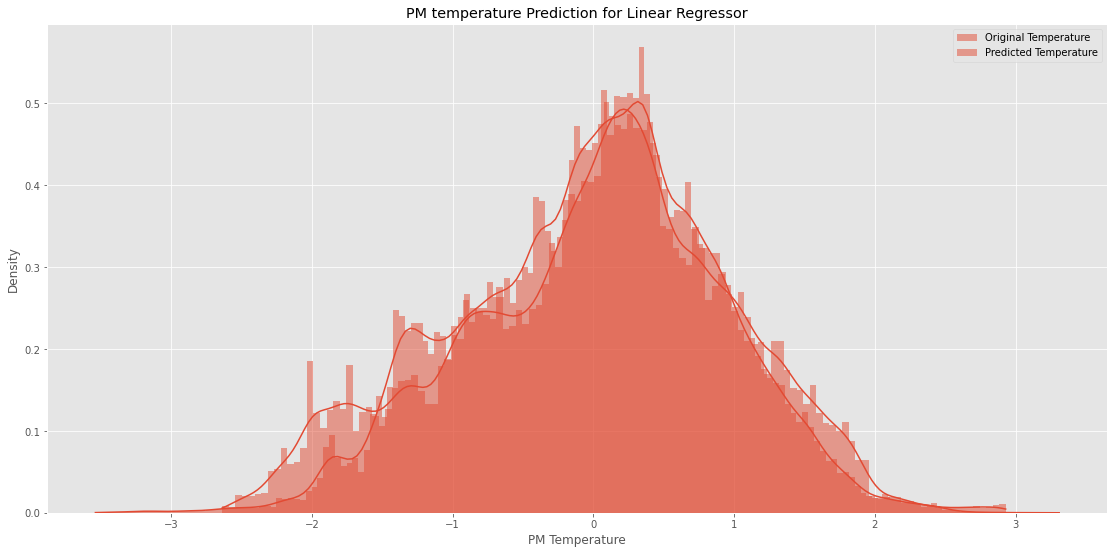

In [39]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Linear Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

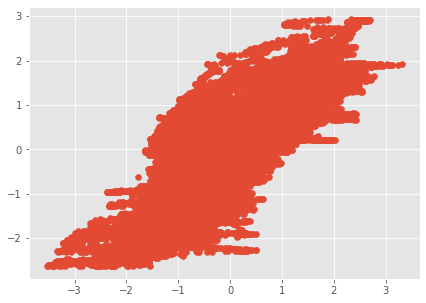

In [40]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

# 2. K_Nearest Neighbours Regressor

In [41]:
k_reg = KNeighborsRegressor(n_neighbors=10,p=2,metric='minkowski')
k_reg.fit(X_train,Y_train)

k_train_acc = (k_reg.score(X_train,Y_train))*100
k_test_acc = (k_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {k_train_acc}")
print(f"Test accuracy: {k_test_acc}")

Train accuracy: 99.25082110735671
Test accuracy: 98.99361645443634


In [42]:
Y_pred = k_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614, 1)


In [43]:
r2_k = r2_score(Y_test, Y_pred)*100
rms_k = sqrt(mean_squared_error(Y_test, Y_pred))
mae_k = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_k} %")
print(f"RMSE {rms_k}")
print(f"MAE {mae_k}")

R^2 score  98.99361645443634 %
RMSE 0.1002711612245651
MAE 0.03393914566552563


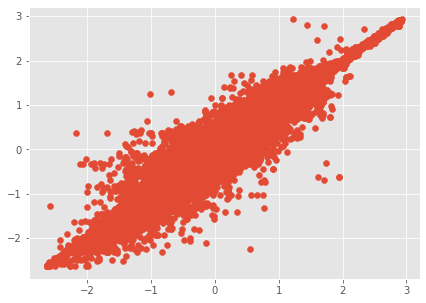

In [45]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

# 3.  XG Boosting Regressor

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from xgboost import XGBRegressor

In [49]:
x_reg = XGBRegressor()
x_reg.fit(X_train,Y_train)

x_train_acc = (x_reg.score(X_train,Y_train))*100
x_test_acc = (x_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {x_train_acc}")
print(f"Test accuracy: {x_test_acc}")

Train accuracy: 96.80005961975114
Test accuracy: 96.68626235989856


In [50]:
Y_pred = x_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [51]:
r2_x = r2_score(Y_test, Y_pred)*100
rms_x = sqrt(mean_squared_error(Y_test, Y_pred))
mae_x = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_x}")
print(f"RMSE is {rms_x}")
print(f"MAE {mae_x}")

R^2 score  96.68626235989856
RMSE is 0.18195053679641443
MAE 0.1282173626540316


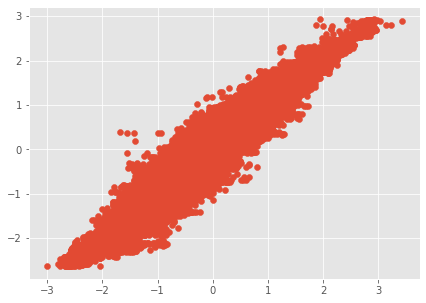

In [52]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

# 4. AdaBoosting Regressor

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
ab_reg = AdaBoostRegressor()
ab_reg.fit(X_train,Y_train)

ab_train_acc = (ab_reg.score(X_train,Y_train))*100
ab_test_acc = (ab_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {ab_train_acc}")
print(f"Test accuracy: {ab_test_acc}")

Train accuracy: 69.61604804099288
Test accuracy: 69.55042153202842


In [55]:
Y_pred = ab_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [56]:
r2_ab = r2_score(Y_test, Y_pred)*100
rms_ab = sqrt(mean_squared_error(Y_test, Y_pred))
mae_ab = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_ab} %")
print(f"RMSE is {rms_ab}")
print(f"MAE {mae_ab}")

R^2 score  69.55042153202842 %
RMSE is 0.5515500434819328
MAE 0.4514067997680858


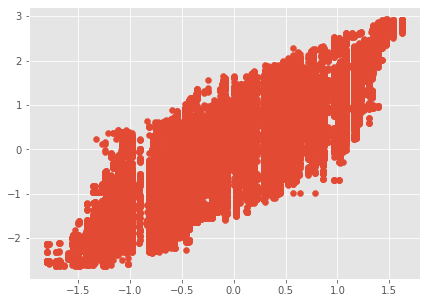

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

# 5. Random Forest Regressor

In [58]:
r_reg = RandomForestRegressor()
r_reg.fit(X_train,Y_train)

r_train_acc = (r_reg.score(X_train,Y_train))*100
r_test_acc = (r_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {r_train_acc}")
# printf("Train accuracy is %f", r_train_acc)
print(f"Test accuracy: {r_test_acc}")
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

Train accuracy: 99.98610598379413
Test accuracy: 99.91311910708588


In [59]:
Y_pred = r_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [60]:
r2_r = r2_score(Y_test, Y_pred)*100
rms_r = sqrt(mean_squared_error(Y_test, Y_pred))
mae_r = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score {r2_r} %")
print(f"RMSE {rms_r}")
print(f"MAE {mae_r}")

R^2 score 99.91311910708588 %
RMSE 0.029461606092462178
MAE 0.008133818221711364


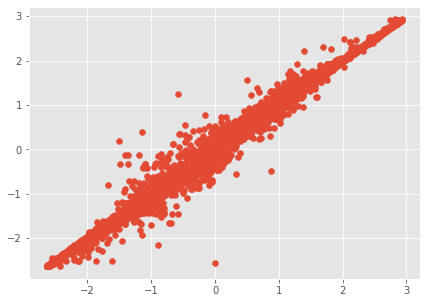

In [61]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

# 6. Decision Tree Regressor

In [62]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train,Y_train)

d_train_acc = (d_tree.score(X_train,Y_train))*100
d_test_acc = (d_tree.score(X_test,Y_test))*100

print(f"Train accuracy: {d_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {d_test_acc}")

Train accuracy: 100.0
Test accuracy: 99.74797583229362


In [63]:
Y_pred = d_tree.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [64]:
r2_d = r2_score(Y_test, Y_pred)*100
rms_d = sqrt(mean_squared_error(Y_test, Y_pred))
mae_d = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 Score   {r2_d}")
print(f"RMSE        {rms_d}")
print(f"MAE         {mae_d}")

R^2 Score   99.74797583229362
RMSE        0.05017823433510673
MAE         0.007956644567534256


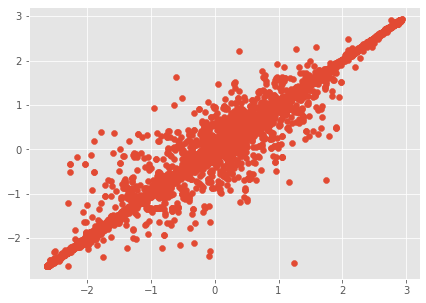

In [65]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

In [123]:
models = pd.DataFrame({
    'Algorithm': ['Linear', 'KNN', 'XGBoosting', 'AdaBoosting',
                  'Random Forest', 'Decision tree'],
    'Training Accuracy' : [l_train_acc, k_train_acc, x_train_acc, ab_train_acc, r_train_acc, d_train_acc ],
    'Testing Accuracy' : [l_test_acc, k_test_acc, x_test_acc, ab_test_acc, r_test_acc, d_test_acc],
    'RMSE Score' : [rms_l, rms_k,rms_x, rms_ab, rms_r, rms_d],
    'MAE Score' : [mae_l,mae_k, mae_x, mae_ab, mae_r, mae_d],
    'R^2 Score': [ r2_l, r2_k,r2_x, r2_ab, r2_r, r2_d],
    #'CV R^2 Score': [r2_l_cv, r2_d_cv, r2_k_cv]
})

models.sort_values(by = ['Training Accuracy', 'Testing Accuracy', 'RMSE Score', 'MAE Score', 'R^2 Score'], 
                   ascending = True)

Algorithm  Training Accuracy  Testing Accuracy  RMSE Score  MAE Score  \
3    AdaBoosting          69.142974         69.088937    0.555714   0.454568   
0         Linear          77.200027         77.286586    0.050368   0.007917   
2     XGBoosting          96.800057         96.684809    0.181990   0.128216   
1            KNN          99.250821         98.993616    0.100271   0.033939   
4  Random Forest          99.986301         99.912533    0.029561   0.008142   
5  Decision tree         100.000000         99.746069    0.050368   0.007917   

   R^2 Score  
3  69.088937  
0  99.746069  
2  96.684809  
1  98.993616  
4  99.912533  
5  99.746069

# Algorithm Vs Training Accuracy

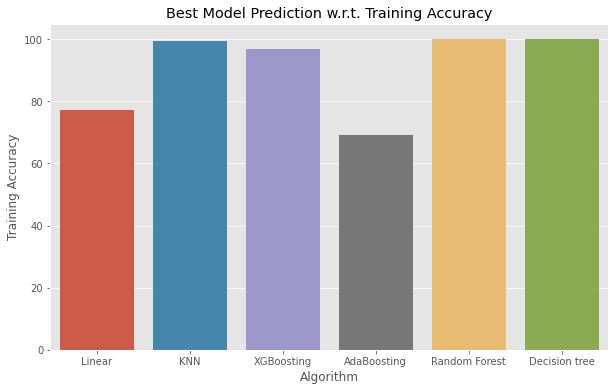

In [126]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='Training Accuracy',data=models)
plt.title("Best Model Prediction w.r.t. Training Accuracy")
plt.show()

# Algorithm Vs Testing Accuracy 

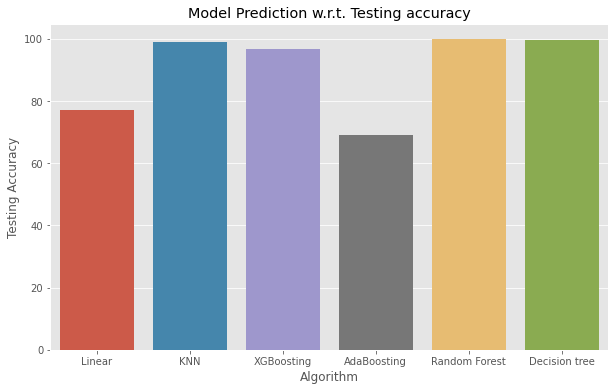

In [127]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='Testing Accuracy',data=models)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()

# Algorithm Vs R^2 Score

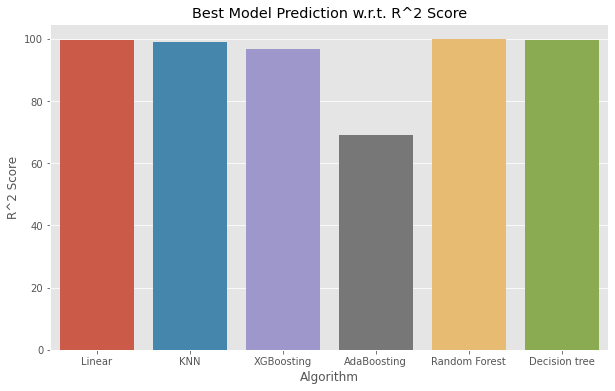

In [128]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.show()

# Model Deployment

# From all the models random forest regressor is the best model as it has best train and test accuracy

In [4]:
import pickle 
pickle_out = open("classifier.pkl","wb") 
pickle.dump("classifier.pkl", pickle_out) 
pickle_out.close()


# The End